In [3]:
pip install yfinance


  Using cached yfinance-0.2.50-py2.py3-none-any.whl (102 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ---------------------------------------- 3.8/3.8 MB 703.9 kB/s eta 0:00:00
     -------------------------------------- 147.9/147.9 KB 1.8 MB/s eta 0:00:00
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ---------------------------------------- 11.6/11.6 MB 2.3 MB/s eta 0:00:00
  Using cached peewee-3.17.8.tar.gz (948 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
     -------------------------------------- 346.6/346.6 KB 1.2 MB/s eta 0:00:00
  Cre

You should consider upgrading via the 'C:\Users\Dell\Desktop\tf\tfvenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [66]:
import yfinance as yf


In [67]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day) #display past 10 years data...

In [68]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [69]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-12-20,4.591729,4.608227,4.693906,4.529771,4.533009,394854485
2004-12-21,4.560211,4.576596,4.679460,4.567878,4.640357,221479058
2004-12-22,4.623496,4.640108,4.653806,4.558165,4.580332,156865776
2004-12-23,4.663203,4.679958,4.697393,4.632636,4.668750,145125936
2004-12-27,4.762721,4.779834,4.814454,4.709846,4.711092,245079187


In [70]:
google_data.shape

(5034, 6)

In [71]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,48.249244,48.413813,48.902157,47.909489,48.391771,1.093818e+08
std,46.130696,46.272671,46.751044,45.786920,46.238746,1.423200e+08
min,4.342810,4.358414,4.443345,4.298140,4.366135,1.584340e+05
25%,13.268599,13.316275,13.436387,13.191866,13.332526,2.660900e+07
50%,27.898726,27.998970,28.305882,27.821790,28.053786,5.123468e+07
75%,63.699122,63.927999,64.448250,63.064501,63.755625,1.333409e+08
max,198.160004,198.160004,202.880005,196.690002,198.529999,1.650833e+09


In [72]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-12-20 to 2024-12-18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5034 non-null   float64
 1   (Close, GOOG)      5034 non-null   float64
 2   (High, GOOG)       5034 non-null   float64
 3   (Low, GOOG)        5034 non-null   float64
 4   (Open, GOOG)       5034 non-null   float64
 5   (Volume, GOOG)     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [73]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of Google Data')

<Figure size 1500x500 with 0 Axes>

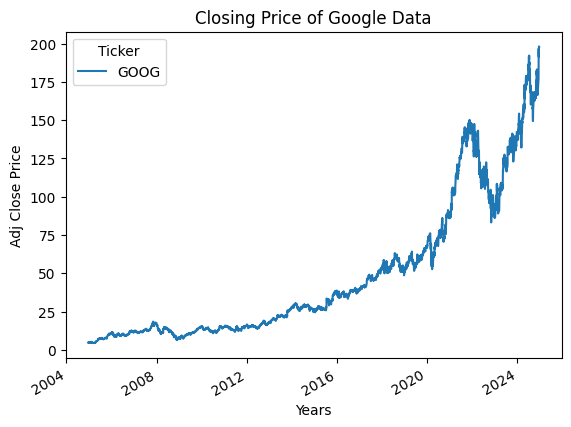

In [75]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel('Years')
plt.ylabel('Adj Close Price')
plt.title('Closing Price of Google Data')

In [76]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel('Years')
    plt.ylabel(column_name)
    plt.title( f"{column_name} Price of Google Data")

In [77]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

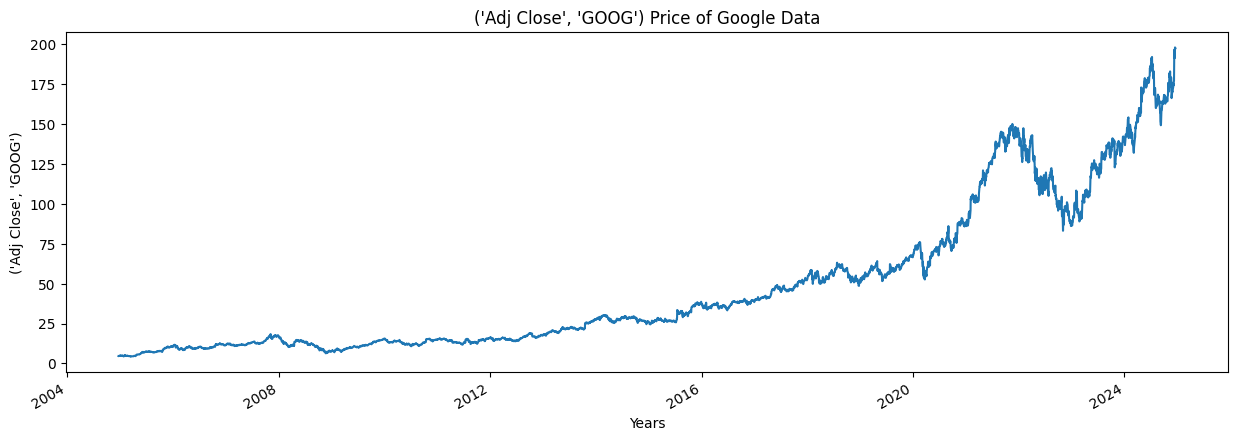

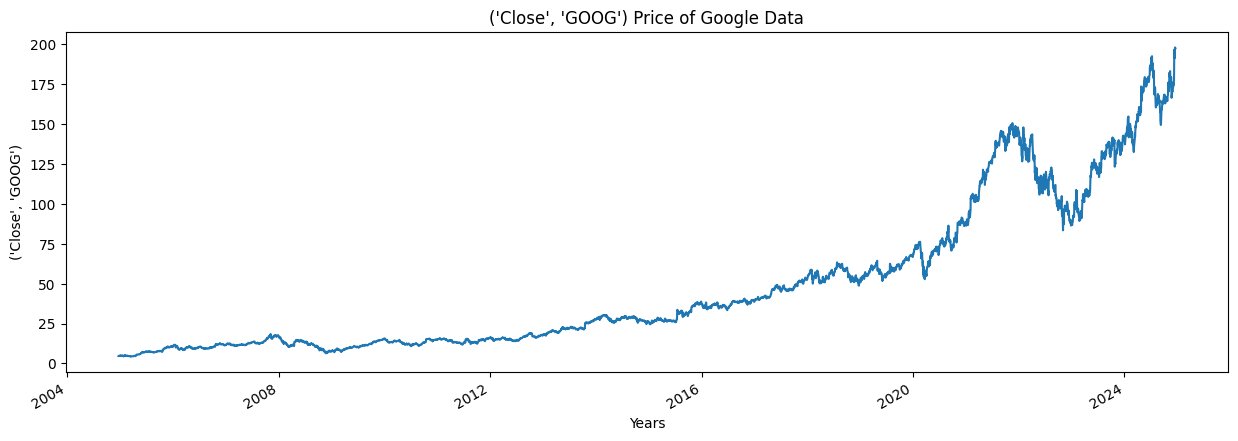

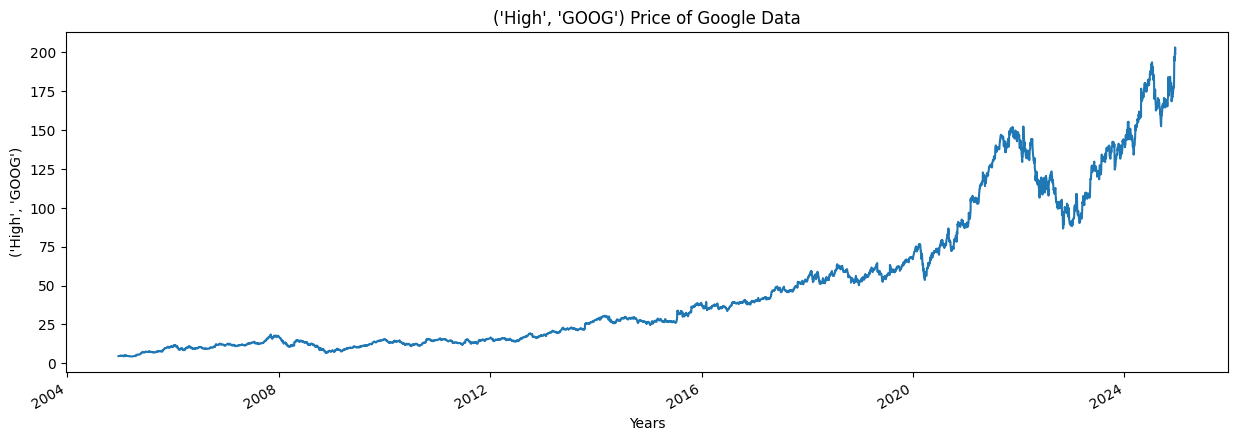

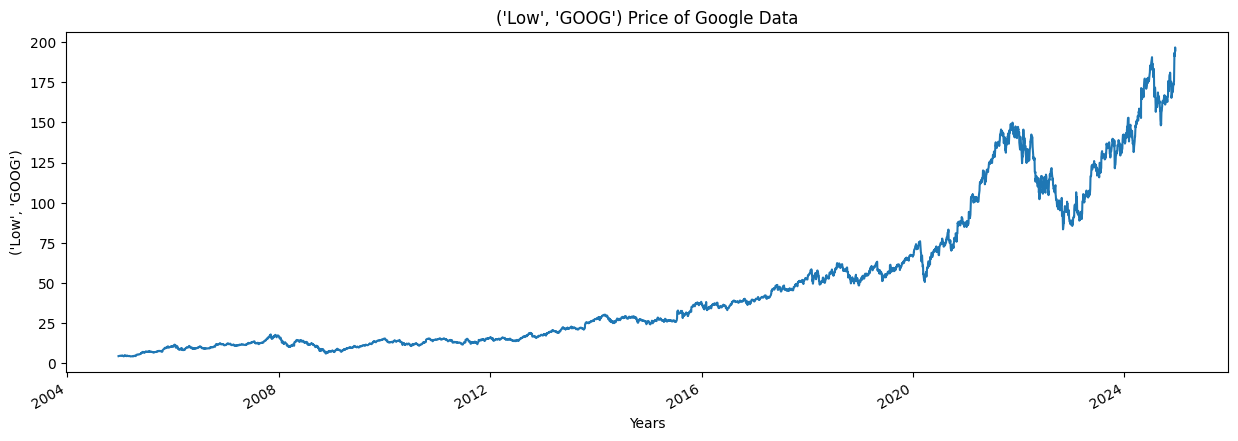

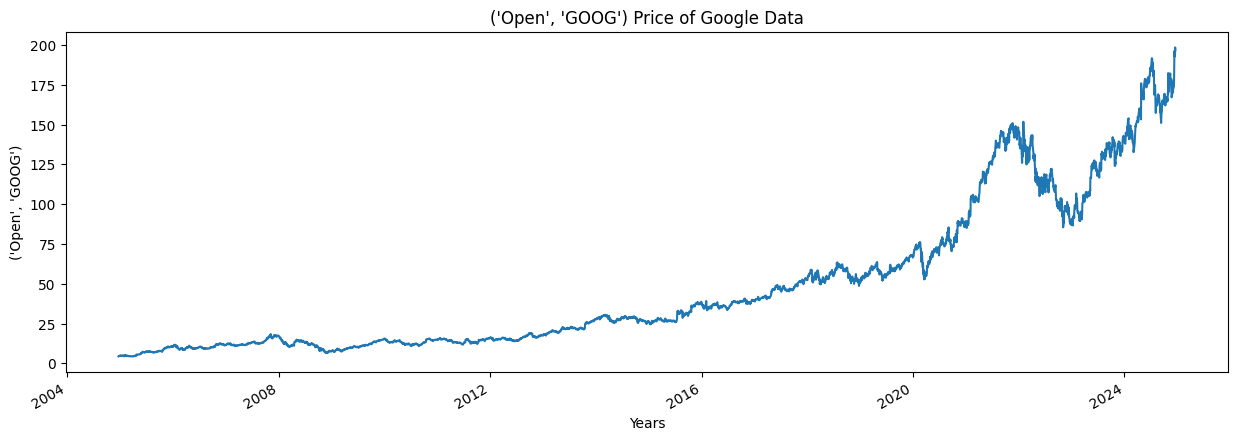

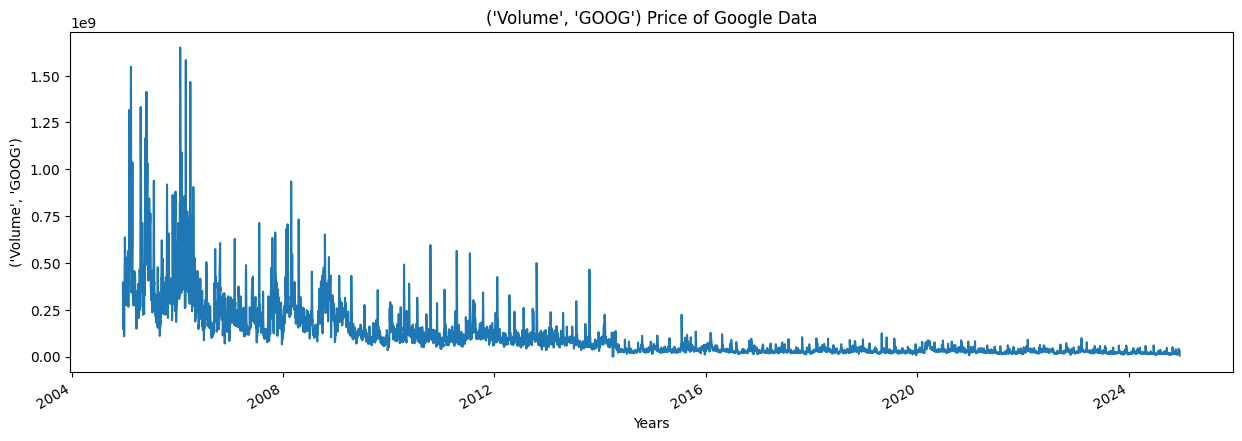

In [78]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [20]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 
# MA for 5 days ==> null null null null MA is moving average means current date and previous 4 days average

In [79]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#   10 + -- +50/5 =30
print(sum(temp_data[:5])/5)

30.0


In [80]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [81]:
data['MA']=data.rolling(5).mean() # this will find moving average
data


,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [82]:
for i in range(2004, 2025):
        print(i,list(google_data.index.year).count(i)) # finding no. of days in a year excluding sunday, saturday, public holidays

2004 9
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 244


In [83]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [84]:
google_data['MA_for_250_days'][0:250].tail()
# 2005-12-13    6.629706 is 250th row and from 0 to 249 ,rows are empty...

Date
2005-12-08         NaN
2005-12-09         NaN
2005-12-12         NaN
2005-12-13         NaN
2005-12-14    6.653419
Name: MA_for_250_days, dtype: float64

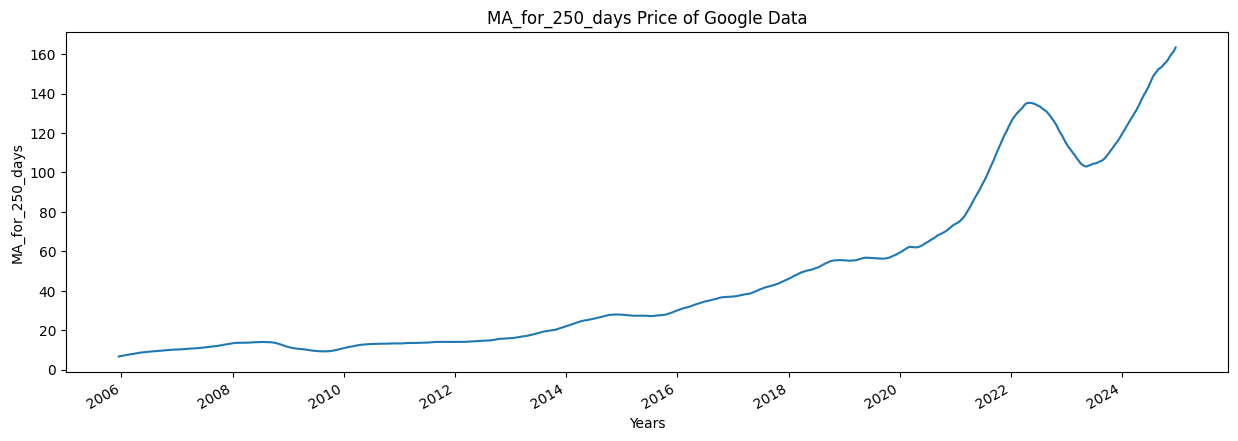

In [85]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

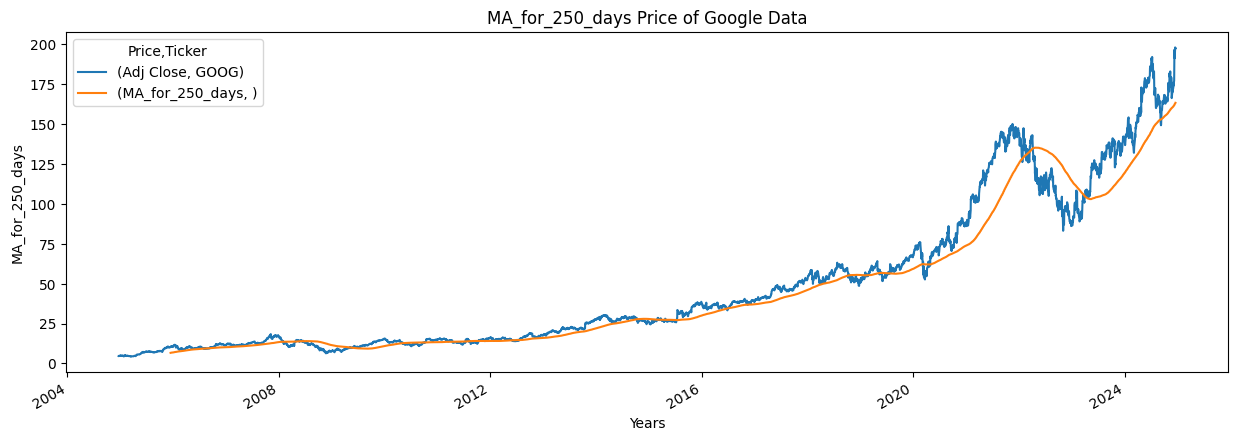

In [86]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

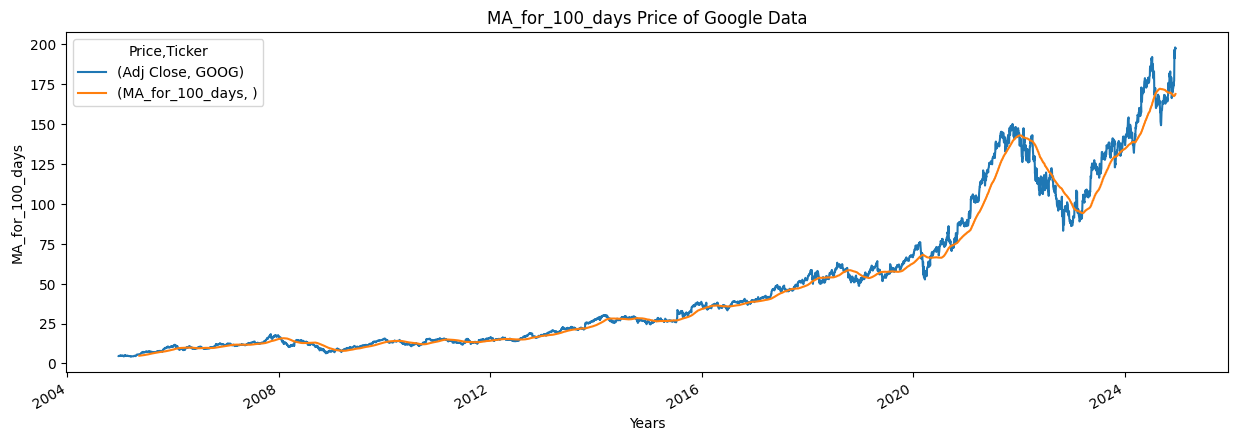

In [87]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

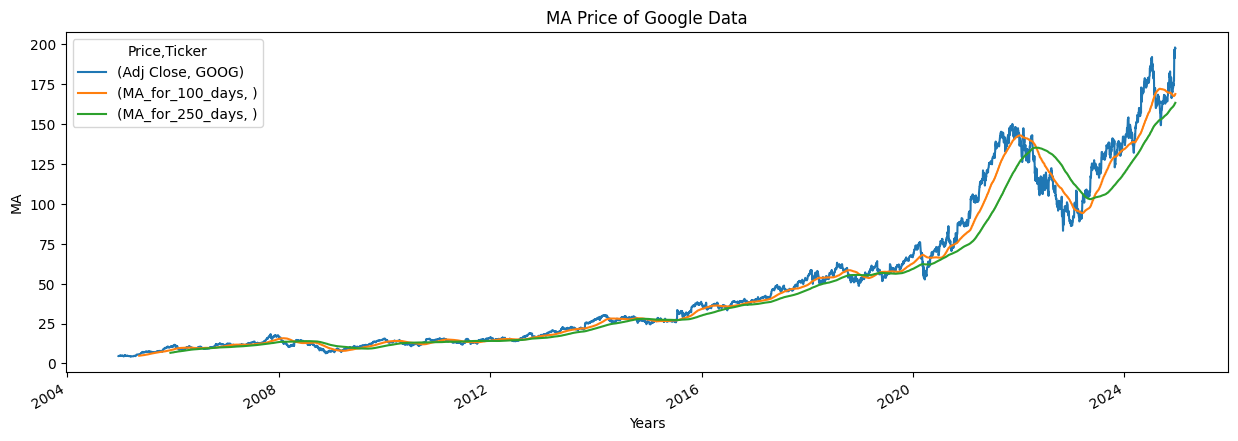

In [88]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [89]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-12-20,4.591729,NaN
2004-12-21,4.560211,-0.006864
2004-12-22,4.623496,0.013878
2004-12-23,4.663203,0.008588
2004-12-27,4.762721,0.021341


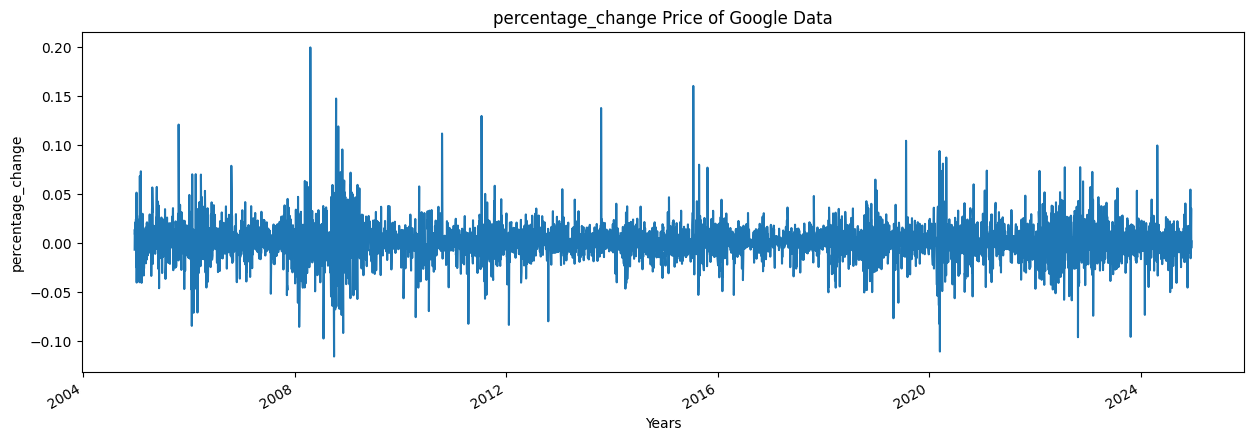

In [90]:
plot_graph((15,5),google_data['percentage_change_cp'],'percentage_change')

In [91]:
Adj_close_price = google_data[['Adj Close']]

In [92]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([198.16000366]), array([4.34280968]))

In [93]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\dell\desktop\tf\tfvenv\lib\site-packages (1.6.0)



You should consider upgrading via the 'C:\Users\Dell\Desktop\tf\tfvenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.0012843 ],
       [0.00112168],
       [0.0014482 ],
       ...,
       [1.        ],
       [0.99463407],
       [0.99638837]])

In [95]:
len(scaled_data)

5034

In [96]:
x_data = []
y_data = []

# take 1 to 100 rows of data 101 row
# for 102 row, 2 to 101 until 5033 rows

for i in range(100, len(scaled_data)): # starting from 100 bez for 99th row, it dont have previous values
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i]) # here upto i only bez we are creating it

    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [97]:
x_data[0], y_data[0]

(array([[1.28429787e-03],
        [1.12168081e-03],
        [1.44819918e-03],
        [1.65306843e-03],
        [2.16653320e-03],
        [2.27537429e-03],
        [2.29329961e-03],
        [2.89511658e-03],
        [2.27921719e-03],
        [3.54942772e-03],
        [2.49816887e-03],
        [2.37140737e-03],
        [1.73630087e-03],
        [2.41494381e-03],
        [2.56987753e-03],
        [2.37524781e-03],
        [2.61085040e-03],
        [2.60445131e-03],
        [3.19858740e-03],
        [3.70180279e-03],
        [2.85670236e-03],
        [2.42390401e-03],
        [1.70172956e-03],
        [7.33705605e-04],
        [2.72737483e-04],
        [1.82465062e-03],
        [1.67611844e-03],
        [1.96550192e-03],
        [2.64158620e-03],
        [2.16525387e-03],
        [3.96557516e-03],
        [4.59300078e-03],
        [3.76070590e-03],
        [2.69408284e-03],
        [3.02828208e-03],
        [2.12428100e-03],
        [1.66331288e-03],
        [1.58904556e-03],
        [2.3

In [98]:
# Now using 70 percent data for training and remaining for testing
int(len(x_data)*0.7) # 3453 is my training data

3453

In [99]:
# 5033-3453=1580 for testing data
5033-100-int(len(x_data)*0.7)

1480

In [100]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [101]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [102]:
# Keras is open source library that gives python interface for ANN but before keras, we need tensorflow environment
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [103]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1))) # 128 is no. of neurons , return_sequence is true bez it says input to sequece of vectors
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Dell\Desktop\tf\tfvenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [105]:
model.fit(x_train, y_train, batch_size=1, epochs=2) # epochs is for training

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 107s 30ms/step - loss: 2.5817e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 98s 28ms/step - loss: 5.7132e-05


In [106]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [107]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [108]:
predictions

array([[0.24755573],
       [0.24972713],
       [0.25266212],
       ...,
       [0.84259826],
       [0.8525915 ],
       [0.8565365 ]], dtype=float32)

In [109]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 52.323368],
       [ 52.74422 ],
       [ 53.313072],
       ...,
       [167.65285 ],
       [169.5897  ],
       [170.35432 ]], dtype=float32)

In [110]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.33866119],
       [ 56.4372139 ],
       [ 57.09435272],
       ...,
       [198.16000366],
       [197.11999512],
       [197.46000671]])

In [111]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

np.float64(11.962682162968635)

In [112]:
# rmse is 3 and 3 is less error ...


ploting_data = pd.DataFrame(
{
    'Original_test_data':inv_y_test.reshape(-1), # means we are shaping it into 1D Array
    'predictions':inv_predictions.reshape(-1)
},
   index = google_data.index[splitting_len+100:]
    
    
)
ploting_data.head()

,Original_test_data,predictions
Date,,
2019-02-01,55.338661,52.323368
2019-02-04,56.437214,52.744221
2019-02-05,57.094353,53.313072
2019-02-06,55.561863,53.872780
2019-02-07,54.738819,53.446415


<Figure size 640x480 with 0 Axes>

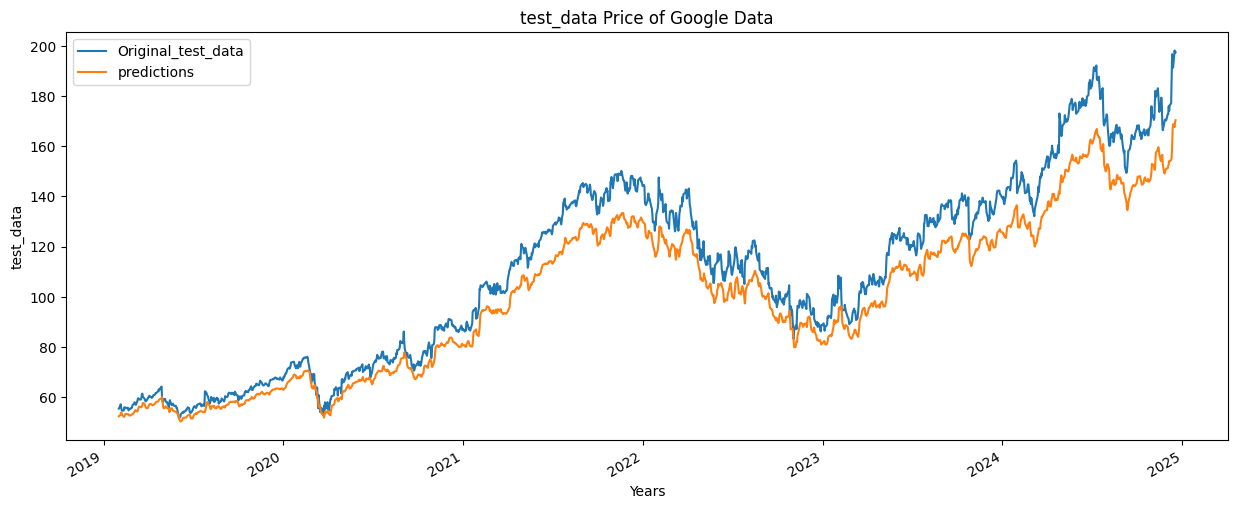

In [113]:
plot_graph((15,6), ploting_data, 'test_data')

<Figure size 640x480 with 0 Axes>

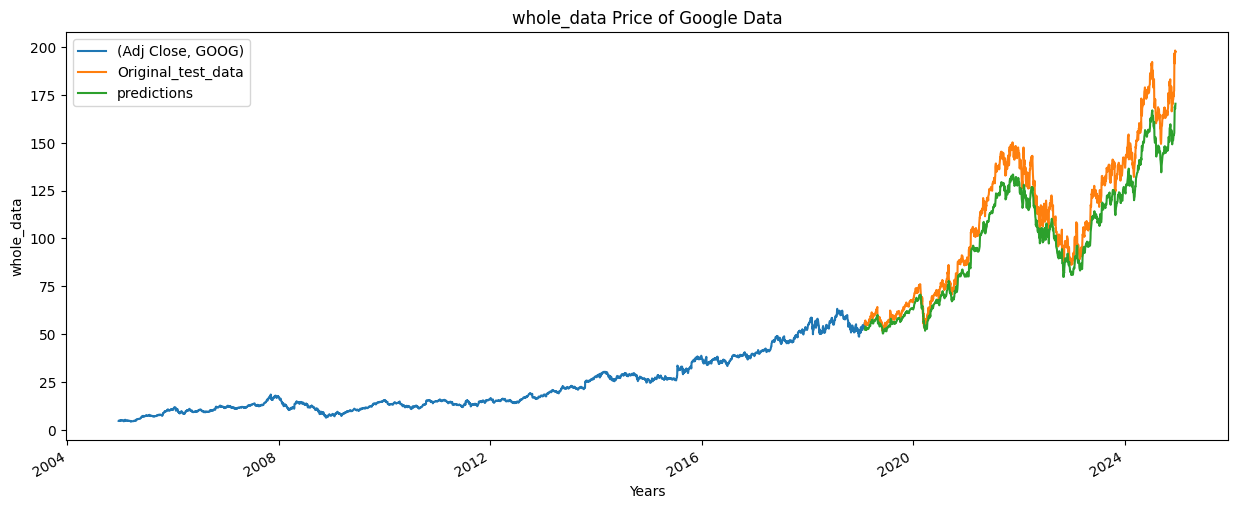

In [114]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], ploting_data], axis=0), 'whole_data')

In [115]:
model.save("Latest_stock_price_model.keras")